# Python and the Web 파이썬과 웹

Python은 우리가 지금까지 배운 것의 응용 프로그램을 실제로 조명하는 방식으로 웹과 상호 작용할 수 있습니다.

이 섹션에서는 `flask`를 사용하여 Python 웹사이트를 전 세계에 제공하는 방법을 배웁니다.

## Building Websites 웹사이트 구축

Python은 웹을 탐색하는 것 이상을 수행할 수 있는데, 웹을 강화할 수 있습니다!

Instagram, Spotify, Google 및 Netflix와 같은 웹사이트는 모두 백엔드에서 Python을 사용합니다.

대부분의 웹 프로그래밍 언어가 Python만큼 강력하지 않기 때문에 Python은 정말 유용합니다.

Python을 웹에 연결하면 모든 Python 코드(서드파티 라이브러리 포함)를 사용하여 사용자와 상호 작용할 수 있습니다.

Python 라이브러리 `flask`는 웹사이트를 제공하도록 설계되었습니다.

이 라이브러리를 설치하려면 다음 명령을 실행하세요.

In [6]:
!pip install flask

  Using cached Flask-2.2.2-py3-none-any.whl (101 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 8.0 MB/s eta 0:00:00
  Using cached Werkzeug-2.2.2-py3-none-any.whl (232 kB)
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)


`flask-ngrok`이라는 라이브러리는 Flask 앱을 시연하는 간단한 방법입니다.

ngrok 도구를 통해 Flask 앱을 사용하여 인터넷을 통해 로컬 호스트에서 실행할 수 있습니다.

이 라이브러리를 설치하려면 다음 명령을 실행하세요.

In [7]:
!pip install flask-ngrok

  Using cached flask_ngrok-0.0.25-py3-none-any.whl (3.1 kB)


압축된 ngrok TGZ 아카이브 파일을 내려 받습니다.

In [1]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz

--2022-09-16 05:09:31--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 52.202.168.65, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13770165 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.tgz’

ngrok-stable-linux- 100%[===================>]  13.13M  4.63MB/s    in 2.8s    

2022-09-16 05:09:35 (4.63 MB/s) - ‘ngrok-stable-linux-amd64.tgz’ saved [13770165/13770165]



TGZ 파일의 압축을 풉니다.

In [3]:
!tar -xvf ./ngrok-stable-linux-amd64.tgz

ngrok


이제 ngrok 계정에 연결해 보겠습니다.

ngrok 대시보드에 [가입(또는 로그인)](https://dashboard.ngrok.com/)하고 [인증 토큰](https://dashboard.ngrok.com/get-started/your-authtoken)을 받으세요.

ngrok 에이전트는 터널을 시작할 때 인증 토큰(터널 자격 증명이라고도 함)을 사용하여 계정에 로그인합니다.

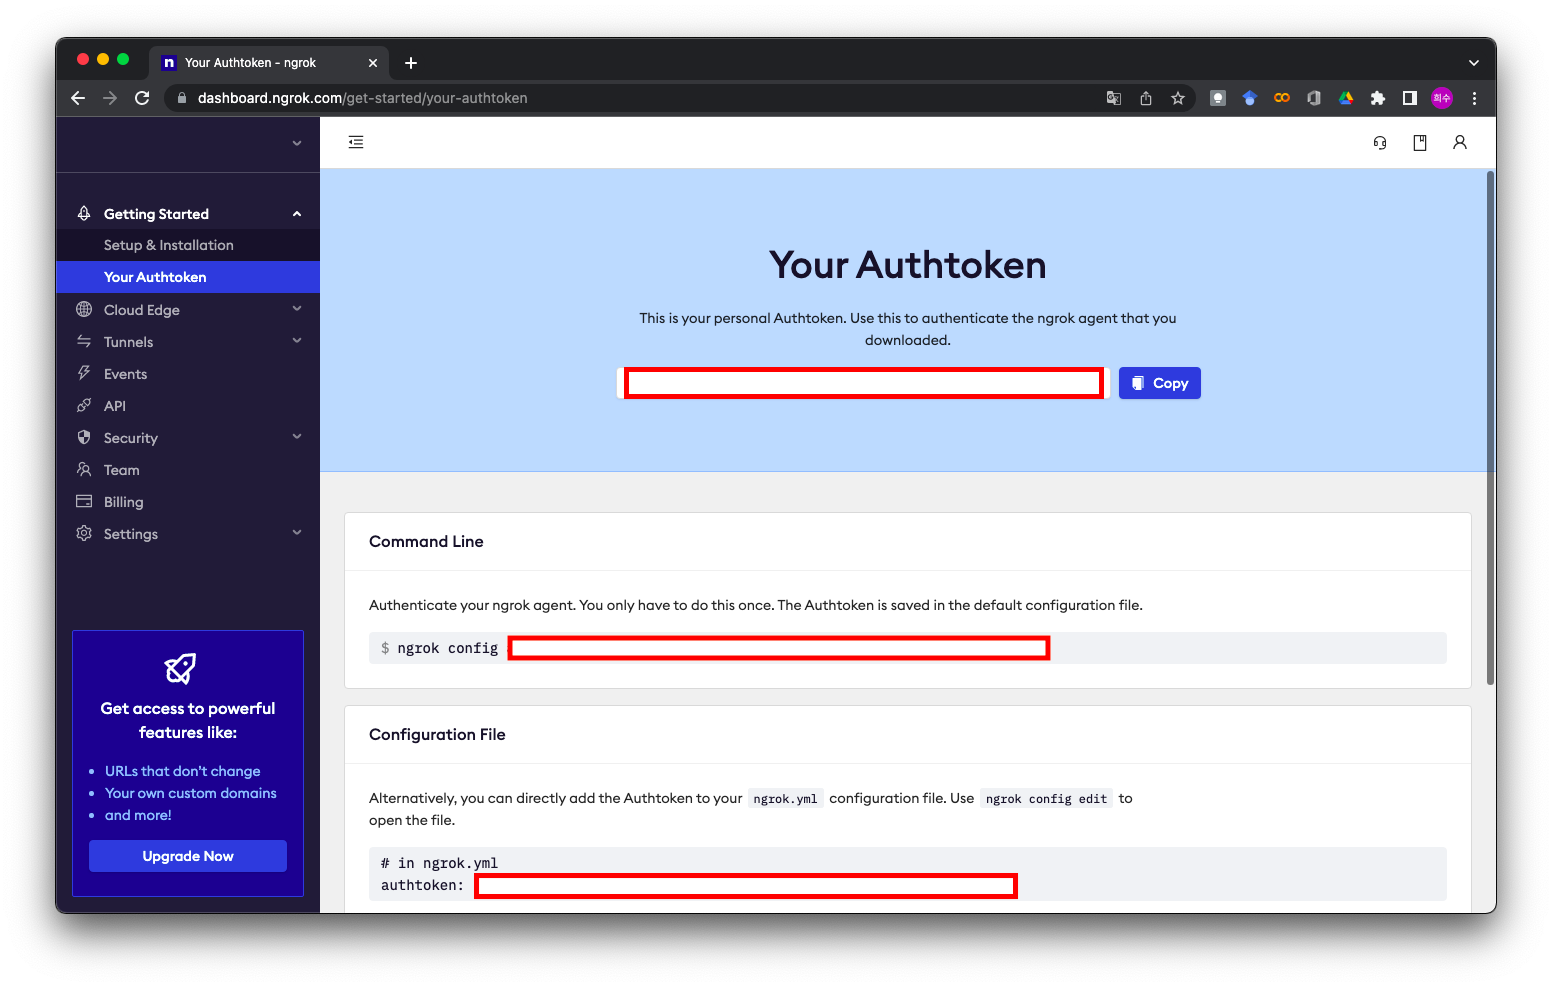

인증 토큰을 사용하여 다운로드한 ngrok 에이전트를 인증합니다.

다음 명령에서 <i><인증토큰></i> 위치에 앞서 받은 인증토큰을 입력하고 명령을 실행합니다.

In [84]:
!./ngrok authtoken 2EpuyZTAF1j8zV7KmBH03IyTD3b_7nboo3dswX1RyT7MUeagy

Authtoken saved to configuration file: /home/ljj0512/.ngrok2/ngrok.yml


그런 다음 `flask`와 `flask_ngork` 라이브러리를 Python 환경으로 가져올 수 있습니다.

`flask` 라이브러리에서 `Flask`라는 객체와 `flask_ngrok` 라이브러리에서 `run_flask_ngrok`이라는 객체를 가져옵니다.

In [85]:
from flask import Flask
from flask_ngrok import run_with_ngrok

### Hello World!

첫 번째 Python 웹사이트를 만들어 봅시다!

In [1]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def main():
    return 'Hello world!'

if __name__ == '__main__':
    app.run(host='localhost', port=8000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://localhost:8000
Press CTRL+C to quit
127.0.0.1 - - [16/Sep/2022 11:43:31] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Sep/2022 11:43:32] "GET / HTTP/1.1" 200 -


: 

여기에서 진행 중인 일이 많으니 하나씩 분해해 보겠습니다.

1. 먼저 `Flask(__name__)`를 호출하고 결과를 `app`에 저장합니다. 이렇게 하면 웹 사이트를 구성하는 데 사용할 Flask 객체가 생성됩니다.
2. 이제 그 `app`을 `run_flask_ngrok` 객체에 매개변수로 받습니다.
3. 그런 다음 `main`이라는 함수를 장식합니다. `main`은 `'Hello world!'`를 반환하고 데코레이터는 `@app.route("/")`입니다. 이것은 사용자가 `/` 경로에 액세스할 때마다 Flask가 이 함수를 호출해야 한다고 앱에 알리는 방법입니다.
4. `__name__` 내장 변수(또는 글로벌 변수)가 `"__main__"`이면, `app`을 실행하도록 합니다.

Flask 서버를 시작합시다!

다음과 같은 출력이 표시되어야 합니다.

<i><사용자별 주소></i>의 URL에 접속하면 웹사이트가 만들어진 것을 확인할 수 있습니다!

<pre>
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   WARNING: This is a development server. Do not use it in a production deployment.
   Use a production WSGI server instead.
 * Debug mode: off
INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Running on http://<i><사용자별 주소></i>.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
</pre>

이제 웹 서버가 실행 중입니다.

브라우저에서 웹 서버를 탐색하고 우리가 무엇을 얻는지 봅시다!

<p align="center">
  <img height="350" alt="A browser window that says 'Hello world!'." src="https://github.com/stanfordpython/course-reader/blob/master/img/6/flask-hello-world.png?raw=true" /><br />
  <i>웹 브라우저에서 https:// ~ .ngrok.io 을 방문합니다.</i>
</p>

### Routing 라우팅

Flask를 사용하여 `/bye`와 같은 하위 경로에서 웹사이트를 호스팅할 수 있습니다.

예를 들어, `/bye` 경로를 처리하는 다른 함수를 추가할 수 있습니다.

In [ ]:
app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def main():
    return 'Hello world!'

@app.route("/bye")
def goodbye():
    return 'Bye! Thanks for visiting!'

if __name__ == "__main__":
    app.run()

이제 Flask 서버를 다시 시작하겠습니다.

그리고 하위 경로로 이동해 보겠습니다.

<p align="center">
  <img height="350" alt="A browser window that says 'Bye! Thanks for visiting!'." src="https://github.com/stanfordpython/course-reader/blob/master/img/6/flask-bye.png?raw=true" /><br />
  <i>웹 브라우저에서 https:// ~ ngrok.io/bye 을 방문합니다.</i>
</p>

또한 경로 내에 변수를 추가할 수 있으며 Flask는 이를 함수에 전달합니다.

예를 들어, `name` 변수를 받는 경로를 만들 수 있습니다.

In [ ]:
app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def main():
    return 'Hello world!'

@app.route("/<name>")
def greet(name):
    return f'Great to meet you, {name}!'

if __name__ == "__main__":
    app.run()

그런 다음 url에서 `/` 뒤에 입력한 단어는 `name` 매개변수로 `greet` 함수에 전달됩니다.

예를 들어,

<p align="center">
  <img height="350" alt="A browser window that says 'Great to meet you, Parth!'." src="https://github.com/stanfordpython/course-reader/blob/master/img/6/flask-greet-Parth.png?raw=true" /><br />
  <i>웹 브라우저에서 https:// ~ ngrok.io/Parth 을 방문합니다.</i>
</p>

그리고 경로를 쌓을 수도 있습니다.

예를 들어, 이 함수는 이름과 성을 받습니다.

In [ ]:
app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def main():
    return 'Hello world!'

@app.route("/<first_name>/<last_name>")
def greet(first_name, last_name):
    return f'Great to meet you, {first_name} {last_name}!'

if __name__ == "__main__":
    app.run()

기본 URL 뒤에 이름과 성을 추가하고 그 사이에 슬래시를 추가하여 액세스할 수 있습니다.

<p align="center">
  <img height="350" alt="A browser window that says 'Great to meet you, Parth Sarin!'." src="https://github.com/stanfordpython/course-reader/blob/master/img/6/flask-greet-Parth-Sarin.png?raw=true" /><br />
  <i>웹 브라우저에서 https:// ~ ngrok.io/Parth/Sarin 을 방문합니다.</i>
</p>

### More Complex Python Operations 더 복잡한 Python 작업

사용자가 웹 페이지를 요청하면 더 복잡한 Python 작업을 수행할 수 있습니다.

예를 들어, 다른 웹사이트를 쿼리할 수도 있습니다!

방문할 때 농담을 하는 웹사이트를 구축해 보겠습니다.

In [ ]:
import requests

app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def main():
    r = requests.get('https://api.jokes.one/jod')

    if r.ok:
        r = r.json()
        r_text = r['contents']['jokes'][0]['joke']['text']
        r_q = r_text[:r_text.find('\r\n')]
        r_a = r_text[r_text.find('\r\n'):]
        return f"Hiya! {r_q}<br /><br />{r_a}"
    else:
        return "Wanna hear something funny? Me too..."

if __name__ == "__main__":
    app.run()

`<br />` 문자열은 웹사이트에 줄 바꿈을 삽입합니다. ("break"를 나타냄) 

이제 웹 사이트를 방문하면 다음과 같이 보입니다.

<p align="center">
  <img height="350" alt="A browser window that says 'Hiya! What kind of music do planets listen to? Nep-tunes.'" src="https://github.com/stanfordpython/course-reader/blob/master/img/6/flask-joke-1.png?raw=true" /><br />
  <i>웹 브라우저에서 http:// ~ ngrok.io 을 방문합니다.</i>
</p>

물론 더 복잡한 작업을 수행할 수도 있습니다.

모든 Python 코드를 실행할 수 있습니다!

데이터베이스 쿼리, 기계 학습 모델 구축 또는 실행 등을 할 수 있습니다. 

가능성은 무한합니다!

### Templates 템플릿

HTML에 익숙하다면 Flask를 HTML과 함께 사용하여 더 멋진 웹사이트를 만들 수 있다는 것을 알아두세요.

Flask는 [Jinja2](https://jinja.palletsprojects.com/en/2.11.x/)를 사용하여 템플릿을 지원하므로 HTML 코드를 작성하고 Python에서 값을 삽입할 수 있습니다!

템플릿을 사용하려면 저장공간의 디렉토리에 `templates`라는 폴더를 만들고 그 안에 확장자가 `.html`인 템플릿을 추가합니다.

> **Sidetrack: Mounting Google Drive 구글 드라이브 마운트**
>
> 구글 드라이브를 마운트하여 저장공간으로 사용할 수 있습니다.
>
> 아래 명령을 실행하면 인증 코드를 사용하여 구글 드라이브를 마운트할 수 있습니다.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

현재 디렉토리를 내 드라이브로 지정합니다.

In [ ]:
%cd /content/drive/MyDrive

현재 디렉토리에 `IT집중교육1-FLASK`라는 폴더를 만듭니다.

In [ ]:
import os
os.mkdir('IT집중교육1-FLASK')

디렉토리에 저장된 `IT집중교육1-FLASK` 폴더를 확인합니다.

In [ ]:
!ls

현재 디렉토리를 `IT집중교육1-FLASK` 폴더로 지정합니다.

In [ ]:
%cd /content/drive/MyDrive/IT집중교육1-FLASK

현재 디렉토리에 `templates` 폴더를 만듭니다.

In [ ]:
import os
os.mkdir('templates')

디렉토리에 저장된 데이터를 확인합니다.

In [ ]:
!ls

HTML 코드로 사용할 문자열을 작성하여 변수 `html_text`에 할당합니다.

In [79]:
x = 'asdklf'
html_text = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Hello!</title>
</head>
<body>
    <h1>Hello, {{ name }}!</h1>
    <h1>Hello, {x}!</h1>
    <a href="/bye">Say goodbye.</a>
</body>
</html>
"""

`templates` 폴더에 `hello.html`이라는 파일을 만들고 열어 파일에 앞서 선언한 변수 `html_text`를 씁니다.

In [80]:
path = './IT집중교육1-FLASK/templates/hello.html'
with open(path, 'w') as f:
    f.write(html_text)

전체적으로 디렉토리 구조는 다음과 같습니다.

<pre>
IT집중교육1-FLASK/
└── templates/
    └── hello.html
</pre>

사용자가 `/hello/<name>`을 방문할 때 `hello.html`을 렌더링하고 싶다고 가정합니다.

먼저, `flask` 라이브러리의 `Flask`와 `render_template` 객체를 불러 옵니다.

In [81]:
from flask import Flask, render_template

다음 Python 코드로 렌더링을 수행할 수 있습니다.

In [86]:
app = Flask(__name__)
run_with_ngrok(app)

@app.route("/hello/<name>")
def greet(name):
    return render_template("hello.html", name=name)

@app.route("/bye")
def goodbye():
    return 'Bye! Thanks for visiting!'

if __name__ == "__main__":
    app.run()
    # app.run(host='localhost', port=8000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
Exception in thread Thread-4:
Traceback (most recent call last):
  File "/opt/conda/envs/data-mining/lib/python3.10/threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "/opt/conda/envs/data-mining/lib/python3.10/threading.py", line 1371, in run
    self.function(*self.args, **self.kwargs)
  File "/opt/conda/envs/data-mining/lib/python3.10/site-packages/flask_ngrok.py", line 70, in start_ngrok
    ngrok_address = _run_ngrok()
  File "/opt/conda/envs/data-mining/lib/python3.10/site-packages/flask_ngrok.py", line 31, in _run_ngrok
    ngrok = subprocess.Popen([executable, 'http', '5000'])
  File "/opt/conda/envs/data-mining/lib/python3.10/subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/opt/conda/envs/data-mining/lib/python3.10/subprocess.py", line 1842, in _execute_child
    raise child_exception_type(errno_num, err_msg, err_filename)
PermissionError: [E

변수 `name=name`을 `render_template` 함수에 전달한 것에 주목하세요.

그러면 템플릿에 `name`이 제공됩니다.

다음과 같이 템플릿 내에서 해당 값을 사용할 수 있습니다.

```
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Hello!</title>
</head>
<body>
    <h1>Hello, {{ name }}!</h1>
    <a href="/bye">Say goodbye.</a>
</body>
</html>
```

그런 다음 관련 URL을 방문하면,

<p align="center">
  <img height="350" alt="A browser window that says 'Hello, Parth!' followed by a link that reads 'Say goodbye.'" src="https://github.com/stanfordpython/course-reader/blob/master/img/6/flask-jinja-hello.png?raw=true" /><br />
  <i>웹 브라우저에서 http:// ~ ngrok.io/hello/Parth 을 방문합니다.</i>
</p>

`Say goodbye.`

텍스트는 유효한 링크이며 클릭하면 다음 페이지로 이동합니다.

<p align="center">
  <img height="350" alt="A browser window that says 'Bye! Thanks for visiting!'." src="https://github.com/stanfordpython/course-reader/blob/master/img/6/flask-bye.png?raw=true" /><br />
  <i>웹 브라우저에서 http:// ~ ngrok.io/bye 을 방문합니다.</i>
</p>

HTML 코드로 사용할 문자열을 작성하여 변수 `html_text`에 할당합니다.

In [ ]:
html_text = """
<!DOCTYPE html>
<html lang="ko">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>{{ name }}</title>
</head>
<body>
    <h1>만나서 반가워요! 내 이름은 {{ name }}입니다.</h1>
    <br />
    <br />
    <h3>대학 재학생</h3>
    <h3>소프트웨어학과</h3>
    <h3>아주대학교</h3>
    <a href="/bye">다음에 또 만나요.</a>
</body>
</html>
"""

`templates` 폴더에 `profile.html`이라는 파일을 만들고 열어 파일에 앞서 선언한 변수 `html_text`를 씁니다.

In [ ]:
path = 'templates/profile.html'
with open(path, 'w') as f:
    f.write(html_text)

사용자가 `/<name>`을 방문할 때 `profile.html`을 렌더링하고 싶다고 가정합니다.

다음 Python 코드로 이를 수행할 수 있습니다.

In [ ]:
app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def main():
    return '만나서 반가워요!'

@app.route("/<name>")
def profile(name):
    return render_template("profile.html", name=name)

@app.route("/bye")
def goodbye():
    return '안녕히 가세요! 방문해줘서 고마워요!'

if __name__ == "__main__":
    app.run()

`if` 문 사용, 리스트 처리 등을 포함하여 Jinja에서 더 복잡한 작업을 수행할 수 있습니다.

여기에서 Jinja에 대해 읽어보세요. <https://jinja.palletsprojects.com/>

# 예제: 책을 소개하는 나만의 웹 페이지 만들기

앞서 배운 내용들을 바탕으로 책을 소개하는 나만의 웹 페이지를 만들어 봅시다!

현재 디렉토리를 `IT집중교육1-FLASK` 폴더로 지정합니다.

In [ ]:
%cd /home/ljj0512/private/data-mining/IT집중교육1-FLASK

디렉토리에 저장된 `templates` 폴더를 확인합니다.

In [ ]:
!ls

먼저, 소개할 책의 텍스트 정보를 관련 웹사이트에서 가져 와 봅시다!

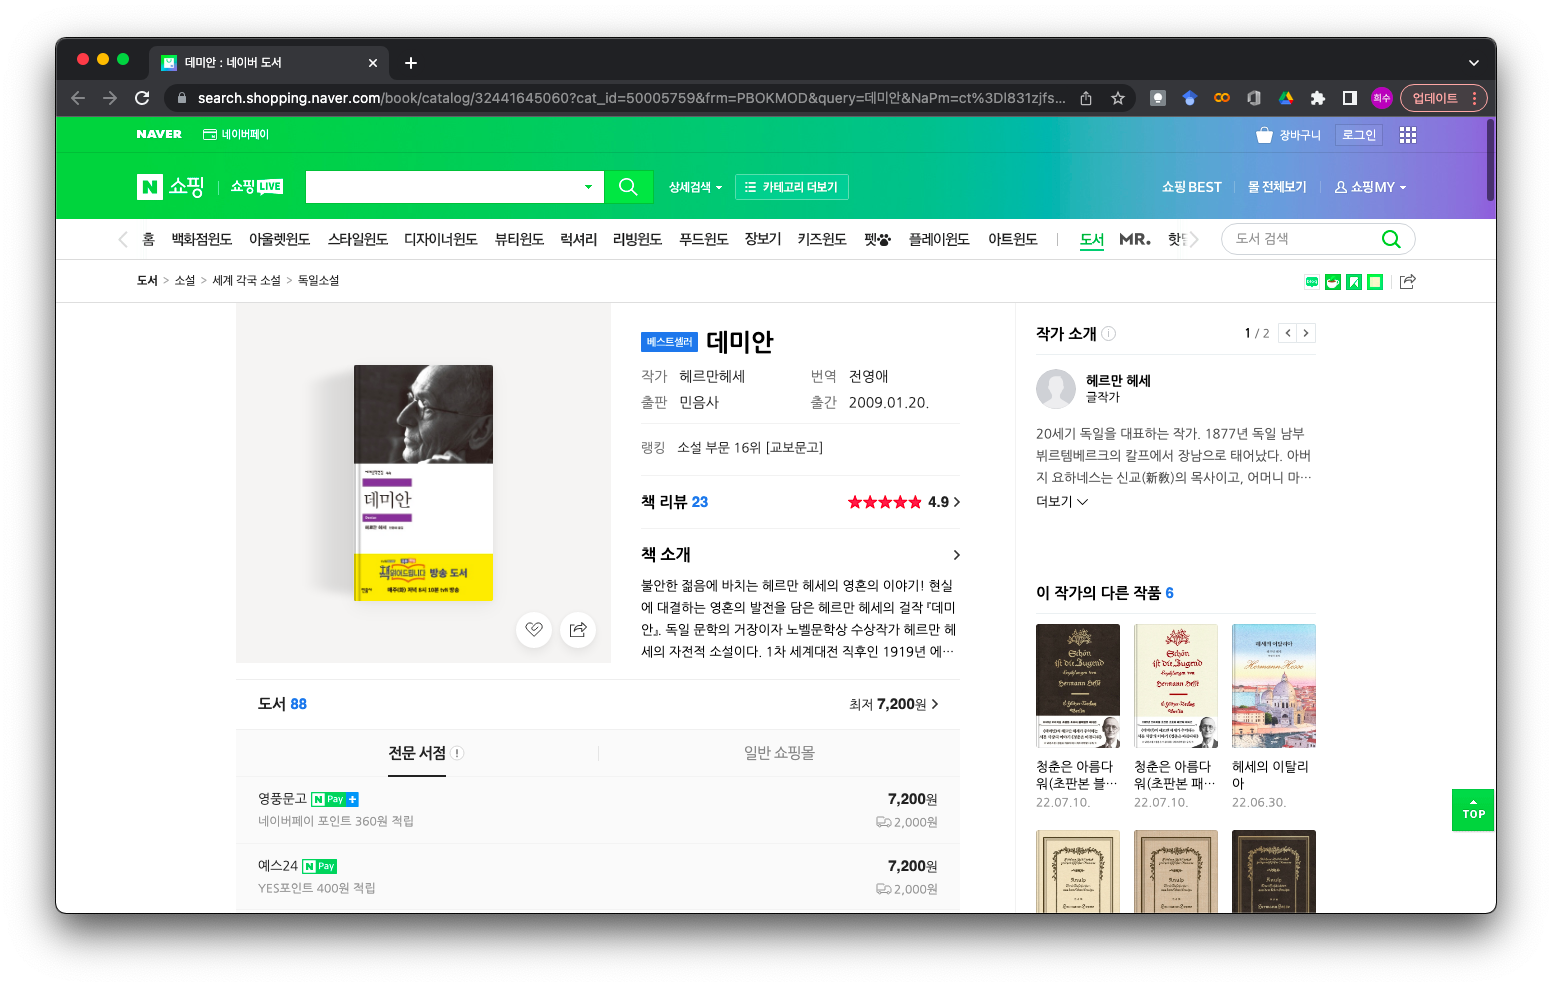


<p align="center">
  <i>네이버 책 웹사이트 https://book.naver.com/ 에서 소개할 책을 검색해 텍스트 정보를 확인합니다.</i>
</p>

소개할 책에 대한 정보에서 게시하고 싶은 내용을 복사해 텍스트 파일에 저장합니다.

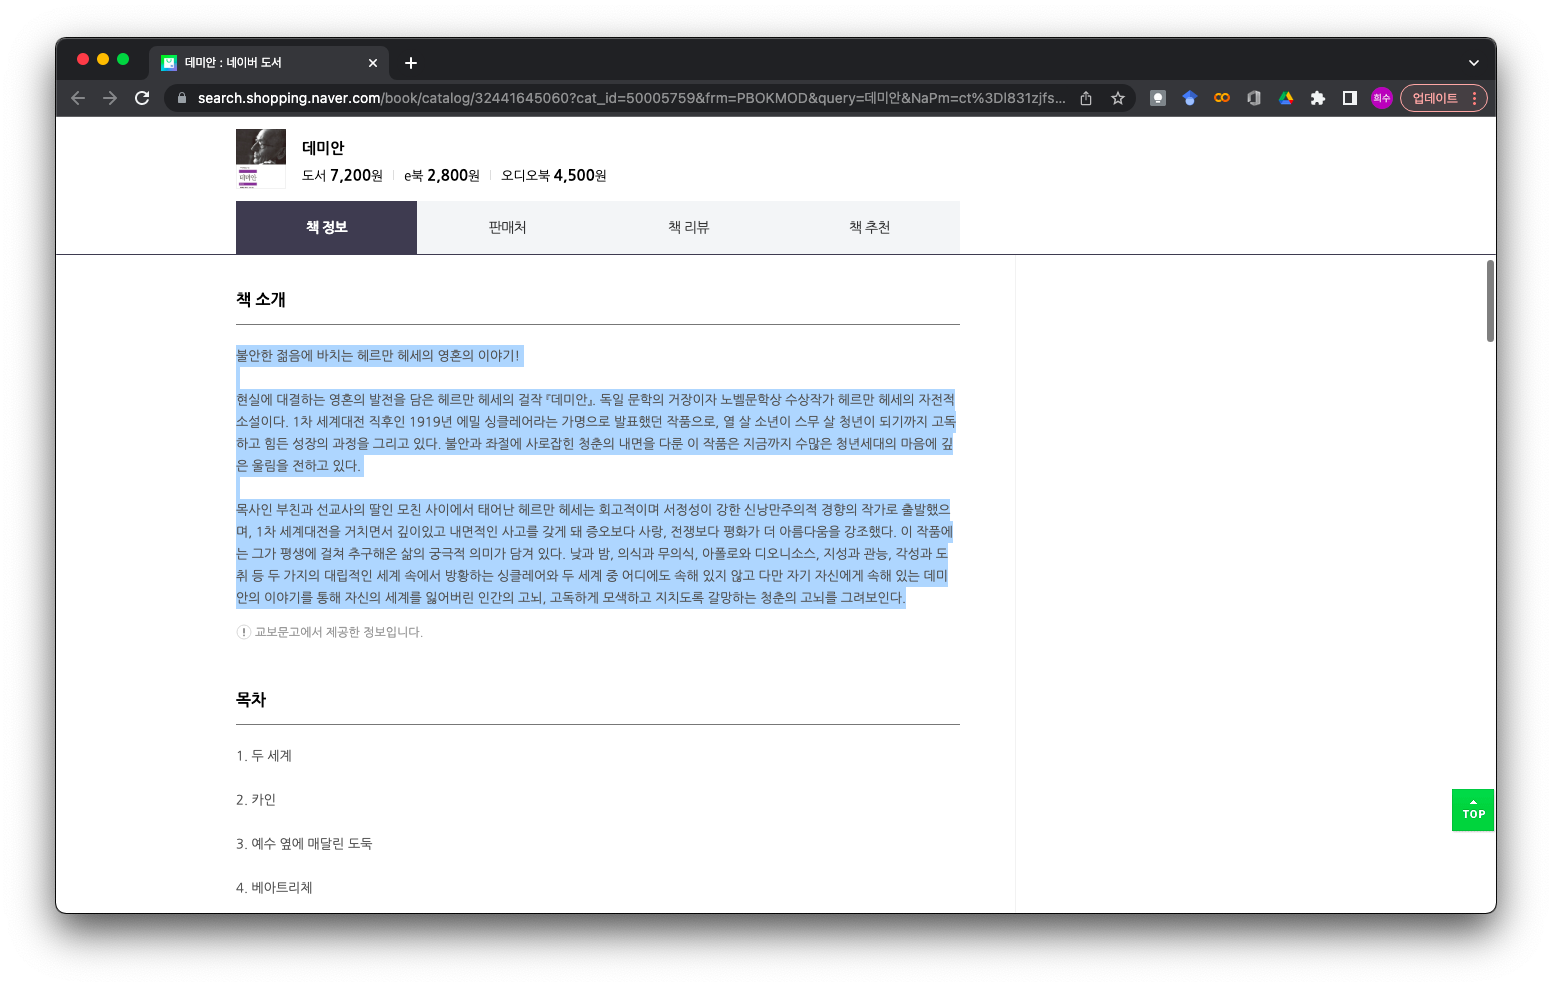


<p align="center">
  <i>네이버 책 웹사이트 https://book.naver.com/ 에서 소개할 책의 텍스트 정보를 복사하여 텍스트 파일에 저장합니다.</i>
</p>

다음 명령으로 파일을 저장공간에 올릴 수 있습니다.

In [9]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#     print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

import requests
from readability.readability import Document
import bs4

source = 'https://search.shopping.naver.com/book/catalog/32473530345?NaPm=ct%253Dl6uww5e0%257Cci%253Dc30e7906e35bf77b77da27acedf29391955a758b%257Ctr%253Dboksl%257Csn%253D95694%257Chk%253Dccba431e75c35ce2c7e2779448f052e2eb7b6591&query=%ED%81%B4%EB%A3%A8%EC%A7%80&fromWhere=BOOKHOME'
html = requests.get(source).text
soup = bs4.BeautifulSoup(html, 'lxml')
print(links)
# for link in links:
#     print(link)

<html><body><div><div class="blogReviewItem_text_area__iX_3W"><p class="blogReviewItem_text__tDkDp">클루지 저자 개리 마커스 출판 갤리온 발매 2008.11.24. 예스24 북클럽에서 전자책으로 봄 인간은 불완전하다. 멀쩡한 사람이 가끔 말도 안되는 멍청한 짓을 하는 건 진화하면서 급한데로 대충 뚜들겨 만든 클루지 산물이기 때문이다. 이러한 인지적 결함에 대한 구체적인 설명이 나오는데 조금 난이도가 있지만 꽤 흥미롭다. 어려운 단어들이지만 공부삼아 기록 - 확증 편향, 정신적 오염, 닻 내림, 틀 짜기, 부적절한 자기통제, 반추의 순환... </p><div class="blogReviewItem_blog_info__9MbfD"><span class="blogReviewItem_blog_name__Nqqlh">28년 경력 싱어송라이터- 이선율의 셀프프로듀스</span><span class="blogReviewItem_date__ua2NN">2022.08.25.</span></div></div></div></body></html>


디렉토리에 저장된 텍스트 파일을 확인합니다.

In [ ]:
!ls

이제, 저장된 텍스트 파일을 말뭉치 리더로 읽고 구문 분석해 봅시다!

텍스트 파일을 읽어 오기 위해 `PlaintextCorpusReader` 객체를 사용합니다.

In [26]:
# PlaintextCorpusReader 객체를 불러 옵니다.
from nltk.corpus.reader import PlaintextCorpusReader
from nltk.corpus.reader import CorpusReader

말뭉치 리더가 말뭉치에 포함되어야 하는 파일 이름을 식별할 수 있도록 정규 표현식을 지정합니다.

말뭉치 리더에 지정한 정규 표현식을 인자로 받아 저장한 텍스트 파일을 읽습니다.

In [18]:
DOC_PATTERN = '.*\.txt'# 정규 표현식을 지정합니다.

class MyCorpusReader(PlaintextCorpusReader):
    def __init__(self, root, fileids=DOC_PATTERN, encoding='utf8'):
        # Initialize the NLTK corpus reader objects
        PlaintextCorpusReader.__init__(self, root, fileids, encoding)

    def docs(self, fileids=None):
        # Create a generator, loading one document into memory at a time.
        for path in self.abspaths(fileids):
            with open(path, 'r') as f:
                yield f.read()

    def sizes(self, fileids=None):
        # Create a generator, getting every path and computing filesize
        for path in self.abspaths(fileids):
            yield os.path.getsize(path)

# corpus = PlaintextCorpusReader('./IT집중교육1-FLASK/', DOC_PATTERN) # 말뭉치 리더로 텍스트 파일을 읽습니다.
corpus = MyCorpusReader('./IT집중교육1-FLASK/', DOC_PATTERN) # 말뭉치 리더로 텍스트 파일을 읽습니다.


문서를 구문 분석하기 위해 `nltk` 라이브러리의 토크나이저 모델을 사용합니다.

In [19]:
# 토크나이저 모델을 `nltk` 라이브러리에서 내려 받습니다.
from nltk import sent_tokenize, word_tokenize

문서를 개별 토큰으로 구문 분석한 결과를 확인하기 위해 프린팅합니다.

In [43]:
# # 문서를 구문 분석한 결과를 프린팅합니다.
docs = corpus.docs()

def paras(docs):
    for doc in docs:
        doc = doc.split('\n')
        for i in range(len(doc)):
            if i%2 == 1:
                print('홀수',doc[i])
                del doc[i]
            # else:
                # print()
                # print('짝수',doc[i])
        return doc

paras(docs)
    

# def sentToken(docs):
#     for doc in docs:
#         for sent in sent_tokenize(doc):
#             yield sent

# def wordToken(sents):
#     for sent in sents:
#         for word in word_tokenize(sent):
#             yield word

# sents = list(sentToken(docs))
# print(sents)
# print()
# words = list(wordToken(sents))
# print(words)

# print(corpus.paras())
# for word in corpus.paras():
#     print(word)
#     for w in word:
#         print(w)
#         print()

홀수 
홀수 저자는 인간의 마음이 세련되게 설계된 기관이라기보다 클루지(kluge), 곧 서툴게 짜 맞춰진 기구라고 주장한다. 생존 때문에 최선의 선택을 방해받는 진화의 법칙, 즉 진화의 관성 때문에 우리들의 마음과 세계는 불완전하다는 것이다. 저자는 이 책에서 기억, 신념, 선택, 결정, 언어, 행복 등 인간의 삶을 구성하는 중요한 정신 영역을 두루 살피며, 우리들의 세계 곳곳에서 현명한 일상을 방해하는 생각의 함정을 파헤친다.
홀수 


IndexError: list index out of range

변수 `text`에 빈 리스트를 할당하고 한 문장씩 분리된 한 문단이 될 수 있도록 개별 토큰들을 `text` 리스트에 넣어 줍니다.

In [27]:
# for 반복문을 사용하여 개별 토큰들을 하나씩 받아 text 리스트에 넣어 줍니다.
for 

AttributeError: 'str' object has no attribute 'tokenize'

개별 토큰들을 한 문장씩 분리된 하나의 문단으로 만든 결과를 확인하기 위해 프린팅합니다.

In [78]:
# text 리스트를 프린팅 합니다.
for t in text:
    print(*t)

text = 

생각의 오류를 극복할 명쾌한 해답 !
23살에 MIT에서 뇌와 인지과학 박사 학위를 취득하고 30살의 나이에 종신 교수가 된 스타 학자 개리 마커스 교수가 인간 진화의 장대한 시간을 꿰뚫는 역사적인 통찰을 통해 , 근본적으로 새로운 방식으로 인간의 마음을 조망하는 『 클루지 』.
생각하는 사람으로 잘 살기 위한 소중한 단서 , 불완전하지만 고귀한 마음을 최대한 활용하는 독특한 기회를 제공하는 책이다 .
저자는 인간의 마음이 세련되게 설계된 기관이라기보다 클루지 ( kluge ), 곧 서툴게 짜 맞춰진 기구라고 주장한다 .
생존 때문에 최선의 선택을 방해받는 진화의 법칙 , 즉 진화의 관성 때문에 우리들의 마음과 세계는 불완전하다는 것이다 .
저자는 이 책에서 기억 , 신념 , 선택 , 결정 , 언어 , 행복 등 인간의 삶을 구성하는 중요한 정신 영역을 두루 살피며 , 우리들의 세계 곳곳에서 현명한 일상을 방해하는 생각의 함정을 파헤친다 .
우리의 도덕적 선택은 왜 종종 도덕적이지 않으며 , 도덕적 직감은 왜 이토록 허술한지에 대한 통찰을 보여주고 , 언어의 비밀을 파헤치며 무엇이 우리의 소통을 방해하는지 밝혀낸다 .
이어서 우리 내면의 클루지를 활용해서 어떻게 우리들의 세계를 개선시킬 수 있는지 , 생각의 함정에서 생각의 무기를 찾아내는 지혜를 전한다 .
경험적 과학적으로 증명된 13가지 제안을 담아 생각의 함정을 피하고 생각의 무기를 가다듬을 수 있도록 이끌어준다 .


그런 다음, 웹사이트를 만들어 인터넷을 통해 로컬 호스트에서 실행해 봅시다!

현재 디렉토리를 `IT집중교육1-FLASK` 폴더로 지정합니다.

In [ ]:
%cd /content/drive/MyDrive/IT집중교육1-FLASK

HTML 코드를 작성하여 변수 `html_text`에 할당합니다.

In [ ]:
# HTML 코드로 사용할 문자열을 작성하여 변수 `html_text`에 할당합니다.
html_text = """
<!DOCTYPE html>
<html lang="ko">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Hello!</title>
</head>
<body>
    <h1> < {{name}} > </h1>
    <p> {{text}} </p>
</body>
</html>
"""

`templates` 폴더에 앞서 만든 HTML 코드를 저장한 HTML 파일을 만듭니다.

In [ ]:
# templates 폴더에 HTML 파일을 만들고 앞서 선언한 변수 html_text를 씁니다.
path = './IT집중교육1-FLASK/templates/assign02.html'
with open(path, 'w') as f:
    f.write(html_text)

사용할 라이브러리를 불러옵니다.

In [ ]:
# 라이브러리를 불러 와 보세요.

웹사이트를 소개하는 메인 페이지와 책을 소개하는 페이지를 제공하는 웹사이트를 호스팅합니다.

In [ ]:
# Flask 객체를 사용하여 변수 app을 선언하고 run_with_ngrok 객체를 사용하여 변수 app을 인자로 받습니다.
# 메인 페이지를 만드는 함수를 정의하고 하위 경로를 추가해 라우팅하는 함수를 정의합니다.
# 변수 app을 실행합니다.

좋아요! 만든 웹사이트를 좀 더 풍부하게 해 봅시다!

소개할 책을 4권 더 선택하여 웹사이트에 4개의 경로를 추가로 라우팅해 봅시다.

In [ ]:
# HTML 코드로 사용할 문자열을 작성하여 변수 `html_text`에 할당합니다.

In [ ]:
# templates 폴더에 HTML 파일을 만들고 앞서 선언한 변수 html_text를 씁니다.

In [ ]:
# Flask 객체를 사용하여 변수 app을 선언하고 run_with_ngrok 객체를 사용하여 변수 app을 인자로 받습니다.
# 메인 페이지를 만드는 함수를 정의하고 하위 경로를 추가해 라우팅하는 함수를 정의합니다.
# 변수 app을 실행합니다.

메인 페이지에 책 소개 페이지로 넘어갈 수 있는 링크도 걸어 봅시다.



In [ ]:
# HTML 코드로 사용할 문자열을 작성하여 변수 `html_text`에 할당합니다.

In [ ]:
# templates 폴더에 HTML 파일을 만들고 앞서 선언한 변수 html_text를 씁니다.

In [ ]:
# Flask 객체를 사용하여 변수 app을 선언하고 run_with_ngrok 객체를 사용하여 변수 app을 인자로 받습니다.
# 메인 페이지를 만드는 함수를 정의하고 하위 경로를 추가해 라우팅하는 함수를 정의합니다.
# 변수 app을 실행합니다.

웹사이트를 방문하여 메인 페이지와 책 소개 페이지를 확인해 봅시다!

지금까지 배운 것들을 응용하여 나만의 웹사이트를 만들어 원하는 데이터를 게시할 수 있습니다!

> Reference: <br>
https://github.com/gstaff/flask-ngrok <br>
https://ngrok.com/docs/getting-started <br>
https://github.com/stanfordpython/course-reader/blob/master/6-python-and-the-web.md <br>